# EDA on Loan Approval Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv
from ydata_profiling import ProfileReport

In [9]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Loading Data(csv)

In [5]:
df = pd.read_csv('Loan_approval_data_2025.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

### Checking for Duplicated rows

In [16]:
duplicate = df[df.duplicated()]
duplicate

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status


# Using Sweetviz to Auto generate EDA

In [6]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Numerical Features

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.columns

Index(['age', 'years_employed', 'annual_income', 'credit_score',
       'credit_history_years', 'savings_assets', 'current_debt',
       'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks',
       'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status'],
      dtype='object')

## Categorical Features

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

Index(['customer_id', 'occupation_status', 'product_type', 'loan_intent'], dtype='object')

## identifying Outliers
NOT FINISHED

In [ ]:
# Finding and handling outliers
# Simple outlier detection using boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
axes[0].boxplot(df['price'])
axes[0].set_ylabel('Price (£)')
axes[0].set_title('Price Distribution - Boxplot')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(df['price'].median(), color='green', linestyle='--', label='Median')
axes[1].set_xlabel('Price (£)')
axes[1].set_ylabel('Count')
axes[1].set_title('Price Distribution - Histogram')
axes[1].legend()

plt.tight_layout()
plt.show()

## Distribution of Numerical Columns

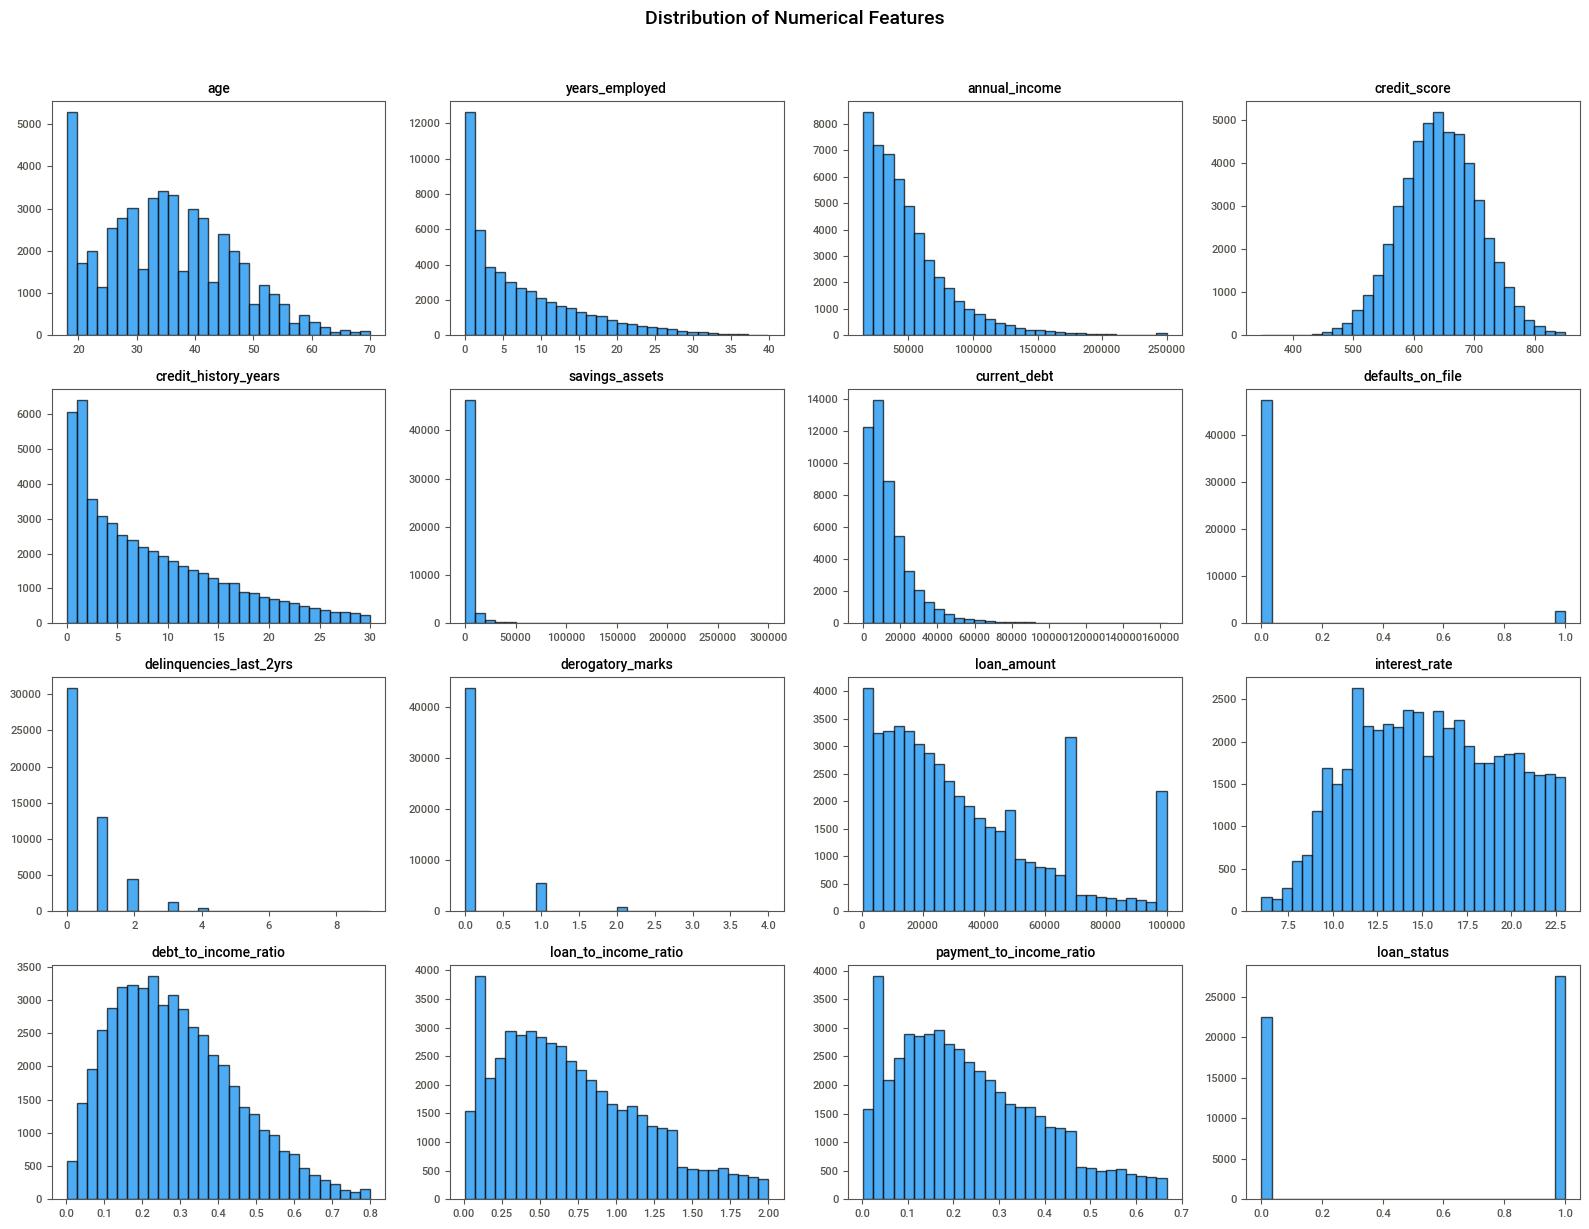

In [15]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
# axes is a 4x4 array of subplots
# axes[0,0]  axes[0,1]  axes[0,2] axes[0,3]
# axes[1,0]  axes[1,1]  axes[1,2] ...
# ...

# To access each subplot, you need row and column indices:
# axes[0,0].plot(data1)
# axes[0,1].plot(data2)
# etc...
axes = axes.ravel()

for idx, col in enumerate(numerical_cols.columns[:16]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()